# REALM: Retrieval-Augmented Language Model Pre-Training





REALM (Retrieval-Augmented Language Model) enhances model predictions by retrieving relevant documents from large corpora, such as Wikipedia. By integrating external knowledge into the language model's predictions, REALM significantly improves the accuracy of responses in open-domain question answering tasks. The retriever is trained using masked language modeling, optimizing retrieval processes to bolster prediction accuracy. Furthermore, it employs Maximum Inner Product Search to efficiently find relevant documents from millions of candidates during training.



## Key Features of REALM



- **Document Retrieval**: Retrieves relevant documents from extensive corpora to enhance model predictions, ensuring that responses are grounded in factual information.

- **Masked Language Modeling Training**: The retriever is trained with masked language modeling, allowing it to learn effective retrieval strategies that improve prediction accuracy.

- **Efficient Search Mechanism**: Utilizes Maximum Inner Product Search (MIPS) for quick and efficient retrieval of relevant documents from a vast pool of candidates during the training phase.

- **Integration of External Knowledge**: By incorporating external knowledge directly into the prediction process, REALM outperforms previous models in open-domain question answering.



## How REALM Works



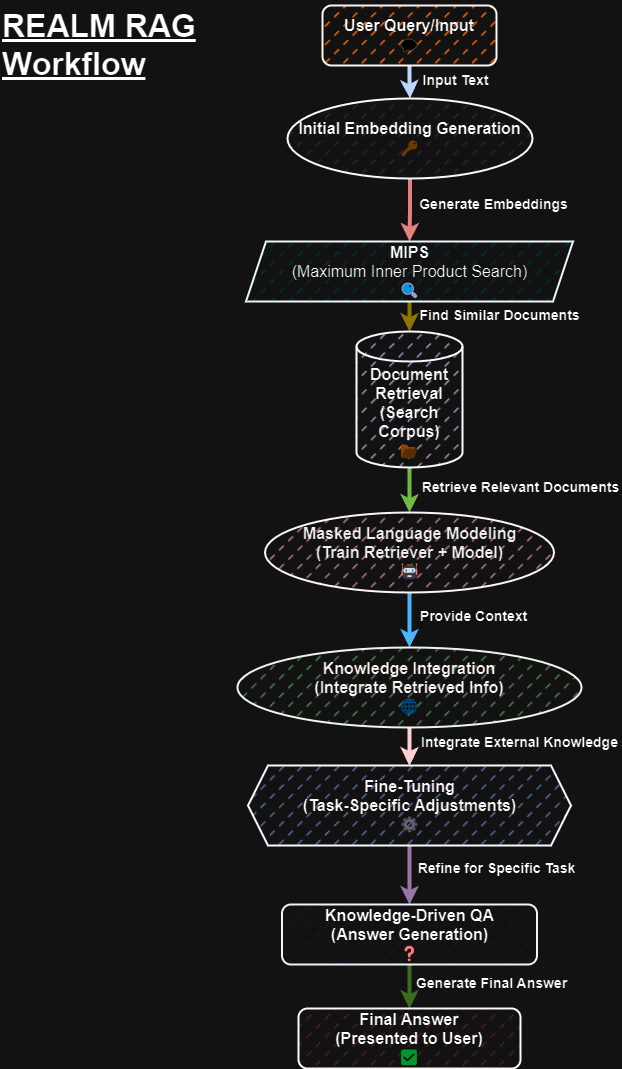

1. **Document Retrieval during Pre-training:**  
   REALM incorporates a latent knowledge retriever that searches a large corpus (e.g., Wikipedia) for relevant documents. The retriever uses embeddings to identify related texts dynamically during the model's pre-training phase.

2. **Masked Language Modeling (MLM):**  
   The retriever and the language model are trained jointly using masked language modeling. For masked tokens in the input text, the retriever fetches documents that help provide the context necessary for token prediction.

3. **Embedding Similarity via MIPS:**  
   REALM employs Maximum Inner Product Search (MIPS) to retrieve documents efficiently based on similarity between query and document embeddings. MIPS ensures that retrieval is computationally feasible even when the corpus contains millions of documents.

4. **Knowledge-Driven Question Answering:**  
   For a given query (e.g., a question), the retriever fetches relevant documents from the corpus. The language model integrates the external knowledge contained in the retrieved documents to generate accurate and informed responses.

5. **Fine-Tuning on Specific Tasks:**  
   REALM is fine-tuned on downstream tasks, such as open-domain question answering. During fine-tuning, the retriever and language model continue to work together, learning to fetch and incorporate task-specific knowledge.

6. **Evaluation and Optimization:**  
   REALM-based RAG is tested on benchmarks for open-domain QA and other tasks. Feedback from performance evaluations helps refine retrieval and response generation for better accuracy and efficiency.

7. **Iterative Knowledge Integration:**  
   The retrieval and generation steps are iteratively improved, enabling the model to answer complex questions requiring external knowledge while maintaining contextual coherence.


In [ ]:
!pip install pypdf2 groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 6.0 MB/s eta 0:00:00


In [ ]:
import os
import requests
from PyPDF2 import PdfReader
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from groq import Groq

# Step 0: Initialize the Groq Client
client = Groq(api_key="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")

# Step 1: Load PDF and Extract Text
pdf_url = "https://arxiv.org/pdf/1810.04805.pdf"
pdf_path = "BERT_paper.pdf"

response = requests.get(pdf_url)
with open(pdf_path, 'wb') as pdf_file:
    pdf_file.write(response.content)

reader = PdfReader(pdf_path)
text = "".join(page.extract_text() for page in reader.pages)

# Step 2: Divide Text into Segments
segment_size = 1200
segments = [text[i:i + segment_size] for i in range(0, len(text), segment_size)]
print(f"Number of segments created: {len(segments)}")

# Step 3: Load Pre-trained SentenceTransformer Model (for semantic embeddings)
retriever = SentenceTransformer('all-MiniLM-L6-v2')  # Pre-trained embedding model

# Step 4: Convert Segments into Semantic Embeddings
segment_embeddings = retriever.encode(segments)

# Step 5: Define Query and Retrieve Relevant Segments using Embedding Similarity (MIPS)
def retrieve_relevant_segments(query, k=5):
    query_embedding = retriever.encode([query])
    similarities = cosine_similarity(query_embedding, segment_embeddings).flatten()
    top_indices = similarities.argsort()[-k:][::-1]
    return [segments[i] for i in top_indices]

query = "What is masked language modeling?"
retrieved_segments = retrieve_relevant_segments(query)

# Step 6: Simulate REALM Process (Knowledge Integration and Document Retrieval)
def realm_process(query, retrieved_segments):
    context = "\n".join(retrieved_segments)

    # Use Groq API to generate a response based on retrieved context
    response = client.chat.completions.create(
        messages=[
            {"role": "system", "content": "You are a retrieval-augmented generation assistant using REALM principles."},
            {"role": "user", "content": f"Query: {query}\n\nContext:\n{context}"},
        ],
        model="llama3-8b-8192",
    ).choices[0].message.content

    return response

# Step 7: Execute REALM-based Process
final_response = realm_process(query, retrieved_segments)

# Step 8: Output Final Response
print("\n--- Final Response ---\n")
print(final_response)


/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


Number of segments created: 54


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]


--- Final Response ---

According to the provided text, Masked Language Modeling (MLM) is a procedure used to train a deep bidirectional representation. It involves masking some percentage of the input tokens at random and then predicting those masked tokens. The final hidden vectors corresponding to the masked tokens are fed into an output softmax over the vocabulary, as in a standard Language Model (LM). In the case of BERT, 15% of all WordPiece tokens in each sequence are masked at random, and the goal is to predict the original vocabulary ID of the masked word based on its context.


## Applications of REALM



- **Open-Domain Question Answering**: Provides accurate answers by leveraging vast amounts of information from external sources like Wikipedia.

- **Knowledge-Based Systems**: Enhances systems that require up-to-date information retrieval, such as customer support bots or virtual assistants.

- **Research Tools**: Assists researchers in quickly finding relevant literature and data by retrieving pertinent documents during inquiry processes.

- **Content Generation**: Aids in generating high-quality content by ensuring that information is accurate and well-supported by retrieved sources.



## Advantages of REALM



- **Enhanced Prediction Accuracy**: The integration of retrieved documents allows for more accurate and contextually relevant responses to user queries.

- **Modular Approach**: The use of a retriever allows for a more modular system where knowledge can be updated independently of the language model itself.

- **Improved Interpretability**: By retrieving and referencing specific documents, REALM provides a clearer rationale for its predictions, enhancing user trust in the system.

- **Scalability**: The ability to leverage large corpora like Wikipedia means that REALM can scale effectively with increasing amounts of data.



## Limitations of REALM



- **Dependence on Document Quality**: The effectiveness of the model is contingent on the quality and relevance of the retrieved documents; poor-quality sources can lead to inaccurate responses.

- **Complexity in Training**: Training the retriever alongside the language model can introduce complexity and require significant computational resources.

- **Latency in Retrieval**: While MIPS is efficient, retrieving documents can still introduce latency in response times, especially with large datasets.



## Conclusion



REALM represents a significant advancement in retrieval-augmented generation methodologies by effectively integrating external knowledge into language model predictions. Its ability to retrieve relevant documents dynamically enhances accuracy and relevance in responses, making it a powerful tool for various applications in natural language processing. As AI continues to evolve, frameworks like REALM will play an essential role in improving the reliability and effectiveness of information retrieval systems.



Having explored REALM, we will now move on to RAPTOR (Tree-Organized Retrieval).